In [42]:
import numpy as np
from collections import defaultdict
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
tokens = defaultdict(lambda : list())

In [3]:
bitokens = defaultdict(lambda : list())

## Extracting and counting tokens from the names

In [4]:
with open('extracted_names.txt', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        line = line[:-1].split('|')
        for j in range(len(line)-1):
            tokens[line[j]].append(i)
            bitokens[(line[j], line[j+1])].append(i)
        tokens[line[-1]].append(i)

In [5]:
len(tokens), len(bitokens)

(3823, 26597)

### Most popular tokens

In [6]:
sorted_tokens = [[t, len(l), l] for t,l in sorted(tokens.items(), key=lambda e: len(e[1]), reverse=True)]

In [7]:
for t, c, _ in sorted_tokens[:25]:
    print(f'Token: {t}, counts: {c}')

Token: get, counts: 11653
Token: test, counts: 8160
Token: set, counts: 2967
Token: to, counts: 2074
Token: create, counts: 1903
Token: file, counts: 1835
Token: run, counts: 1087
Token: read, counts: 1039
Token: write, counts: 982
Token: name, counts: 966
Token: id, counts: 940
Token: with, counts: 919
Token: is, counts: 899
Token: string, counts: 897
Token: job, counts: 877
Token: block, counts: 862
Token: add, counts: 780
Token: node, counts: 769
Token: check, counts: 748
Token: task, counts: 704
Token: container, counts: 678
Token: for, counts: 678
Token: proto, counts: 668
Token: status, counts: 659
Token: init, counts: 639


### Most popular bitokens

In [8]:
sorted_bitokens = [[t, len(l), l] for t,l in sorted(bitokens.items(), key=lambda e: len(e[1]), reverse=True)]

In [9]:
for (t1, t2), c, _ in sorted_bitokens[:25]:
    print(f'Token: ({t1}, {t2}), counts: {c}')

Token: (to, string), counts: 610
Token: (test, get), counts: 367
Token: (proto, format), counts: 357
Token: (set, up), counts: 346
Token: (to, proto), counts: 319
Token: (get, file), counts: 292
Token: (tear, down), counts: 279
Token: (hash, code), counts: 269
Token: (delegation, token), counts: 244
Token: (get, job), counts: 234
Token: (get, task), counts: 207
Token: (get, name), counts: 189
Token: (local, to), counts: 189
Token: (task, attempt), counts: 188
Token: (merge, local), counts: 187
Token: (convert, to), counts: 183
Token: (test, rename), counts: 182
Token: (convert, from), counts: 181
Token: (from, proto), counts: 181
Token: (read, fields), counts: 179
Token: (get, current), counts: 168
Token: (get, container), counts: 166
Token: (get, num), counts: 163
Token: (get, application), counts: 160
Token: (get, block), counts: 149


## Visualize vectors using MDS

In [10]:
with open('extracted.vectors') as vectors_file:
    normalized_vectors = np.loadtxt(vectors_file.readlines())

In [18]:
N = 2000
ex_vectors_idxs = np.random.randint(0,len(normalized_vectors),N)
ex_vectors_idxs_set = set(ex_vectors_idxs)

In [19]:
X = normalized_vectors[ex_vectors_idxs,:]

In [20]:
sim_matrix = X @ X.T

In [21]:
dist_matrix = 1-sim_matrix

In [22]:
mds = MDS(n_components=2, dissimilarity='precomputed')

In [23]:
%%time
X_transformed = mds.fit_transform(dist_matrix)

Wall time: 3min 20s


### Most popular tokens in the vectors space

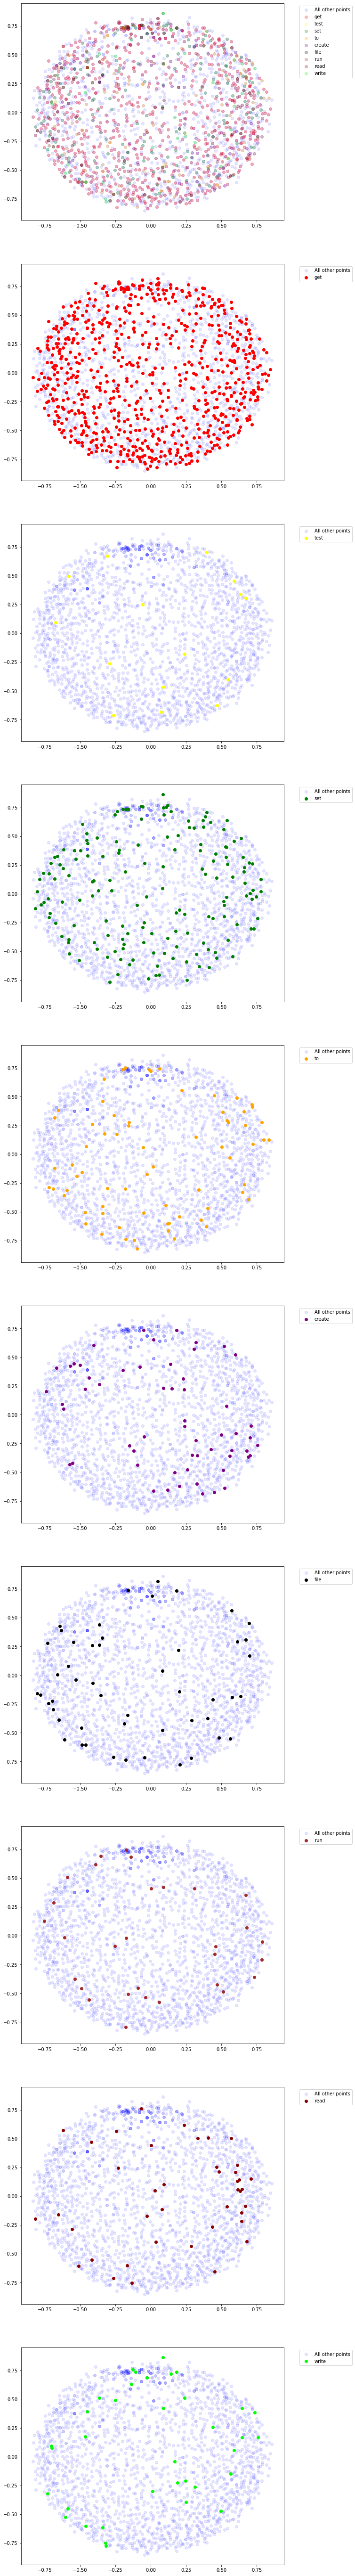

In [38]:
colors = ['red', 'yellow', 'green', 'orange', 'purple', 'black', 'brown', 'darkred', 'lime']
K = 9
f, axs = plt.subplots(K+1, 1, figsize=(10,(K+1)*10))

axs[0].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')

for k in range(K):
    axs[k+1].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')
    
    idxs = np.array([i for i,idx in enumerate(ex_vectors_idxs) if i in sorted_tokens[k][-1]])
    if len(idxs):
        axs[0].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=0.25, label=sorted_tokens[k][0])
        axs[k+1].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=1, label=sorted_tokens[k][0])
    
    axs[k+1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
axs[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Most popular bitokens in the vectors space

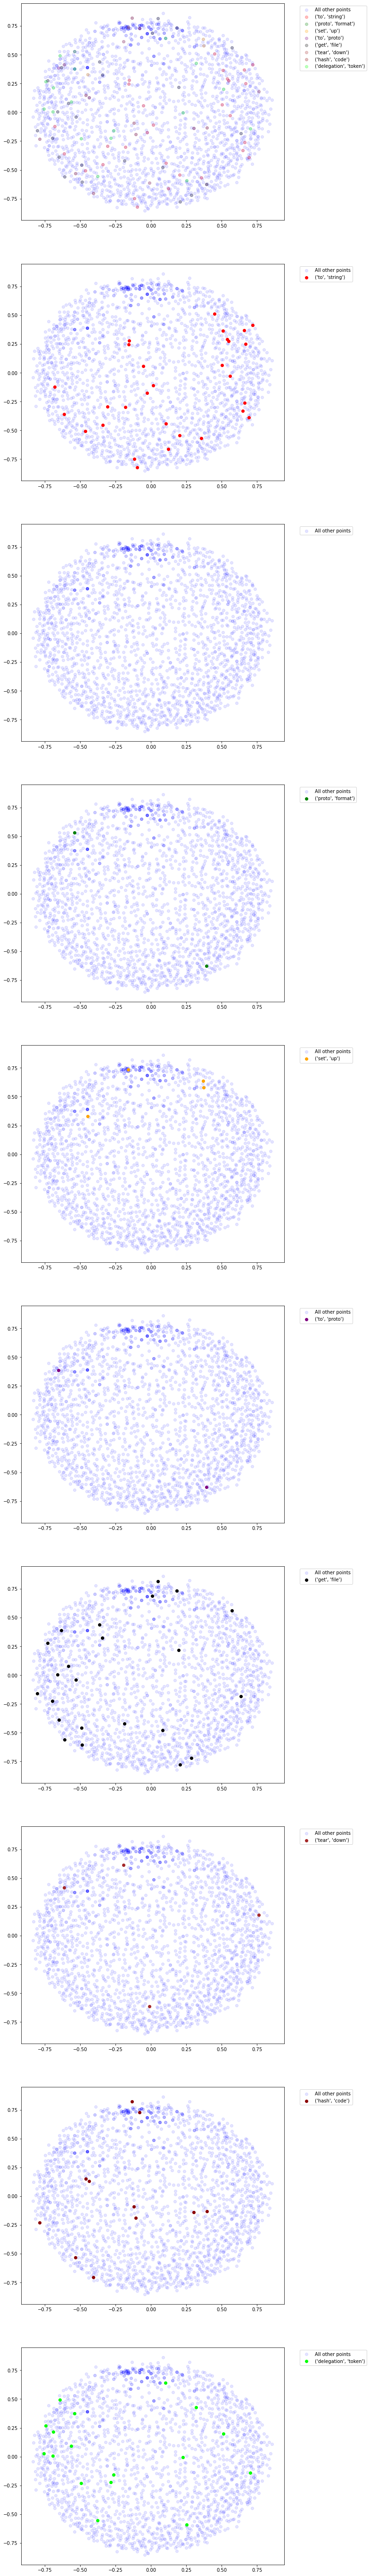

In [39]:
colors = ['red', 'yellow', 'green', 'orange', 'purple', 'black', 'brown', 'darkred', 'lime']
K = 9
f, axs = plt.subplots(K+1, 1, figsize=(10,(K+1)*10))

axs[0].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')

for k in range(K):
    axs[k+1].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')
    
    idxs = np.array([i for i,idx in enumerate(ex_vectors_idxs) if i in sorted_bitokens[k][-1]])
    if len(idxs):
        axs[0].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=0.25, label=sorted_bitokens[k][0])
        axs[k+1].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=1, label=sorted_bitokens[k][0])
    
    axs[k+1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
axs[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

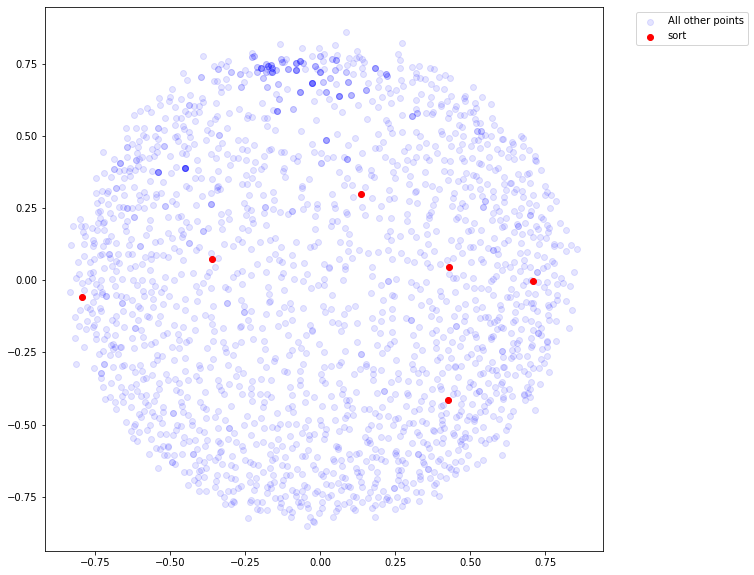

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')
idxs = np.array([i for i,idx in enumerate(ex_vectors_idxs) if i in sorted_tokens[407][-1]])
if len(idxs):
    plt.scatter(X_transformed[idxs,0], X_transformed[idxs,1], c='red', alpha=1.0, label=sorted_tokens[407][0])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## KMeans

In [53]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [68]:
len_ = np.sqrt(np.square(kmeans.cluster_centers_).sum(axis=1)[:,None])
centers = kmeans.cluster_centers_ / len_

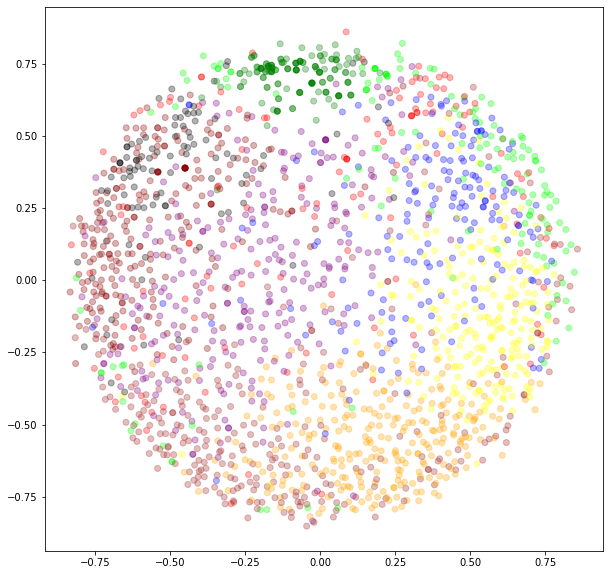

In [70]:
colors = ['red', 'yellow', 'green', 'orange', 'purple', 'black', 'brown', 'darkred', 'lime', 'blue']
c = [colors[i] for i in kmeans.labels_]
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=c, alpha=0.3)
plt.show()

### Extract 128 centers

In [75]:
N = 20000
ex_vectors_idxs = np.random.randint(0,len(normalized_vectors),N)
ex_vectors_idxs_set = set(ex_vectors_idxs)
X = normalized_vectors[ex_vectors_idxs,:]

In [77]:
X = normalized_vectors[:,:]

In [78]:
%%time
kmeans = KMeans(n_clusters=128, random_state=0).fit(X)

Wall time: 2min 22s


In [79]:
len_ = np.sqrt(np.square(kmeans.cluster_centers_).sum(axis=1)[:,None])
centers = kmeans.cluster_centers_ / len_

In [80]:
with open('KMeans_centers.vectors', 'w') as file:
    for vec in centers:
        file.write(' '.join(map(str, vec)) + '\n')

In [84]:
dist_to_centers = (1 - np.dot(centers, X.T)).T

### KMeans distances space

In [94]:
N = 5000
ex_vectors_idxs = np.random.randint(0,len(dist_to_centers),N)
ex_vectors_idxs_set = set(ex_vectors_idxs)

In [95]:
X = dist_to_centers[ex_vectors_idxs,:]

In [96]:
sim_matrix = X @ X.T
dist_matrix = 1-sim_matrix

In [97]:
mds = MDS(n_components=2, dissimilarity='precomputed')

In [98]:
%%time
X_transformed = mds.fit_transform(dist_matrix)

Wall time: 13.5 s


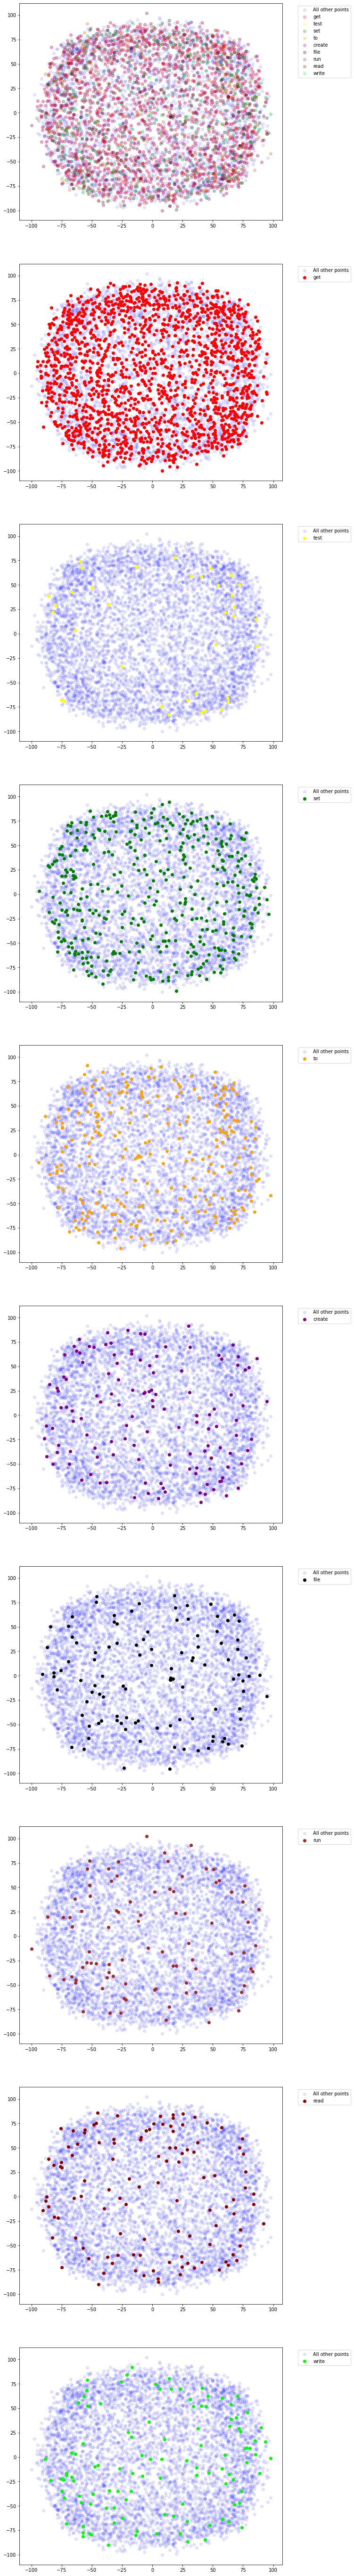

In [99]:
colors = ['red', 'yellow', 'green', 'orange', 'purple', 'black', 'brown', 'darkred', 'lime']
K = 9
f, axs = plt.subplots(K+1, 1, figsize=(10,(K+1)*10))

axs[0].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')

for k in range(K):
    axs[k+1].scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')
    
    idxs = np.array([i for i,idx in enumerate(ex_vectors_idxs) if i in sorted_tokens[k][-1]])
    if len(idxs):
        axs[0].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=0.25, label=sorted_tokens[k][0])
        axs[k+1].scatter(X_transformed[idxs,0], X_transformed[idxs,1], c=colors[k], alpha=1, label=sorted_tokens[k][0])
    
    axs[k+1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
axs[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

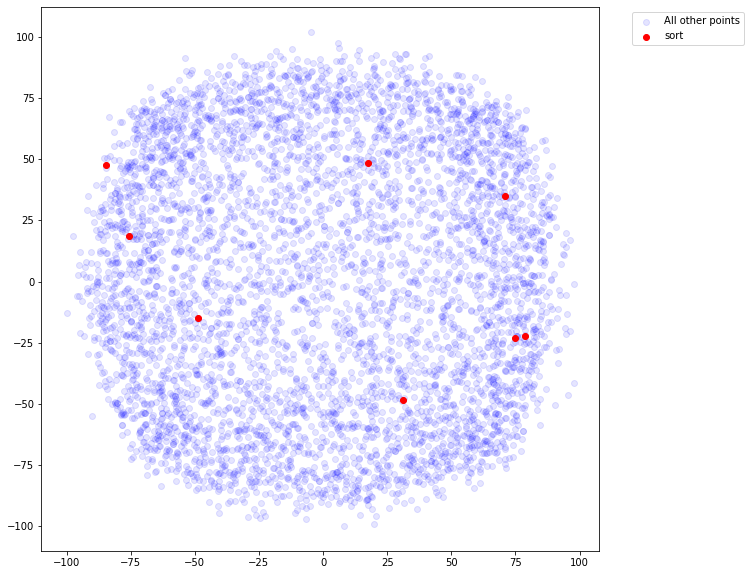

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c='blue', alpha=0.1, label='All other points')
idxs = np.array([i for i,idx in enumerate(ex_vectors_idxs) if i in sorted_tokens[407][-1]])
if len(idxs):
    plt.scatter(X_transformed[idxs,0], X_transformed[idxs,1], c='red', alpha=1.0, label=sorted_tokens[407][0])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()